<a href="https://colab.research.google.com/github/Zkeera/machine-learning-dasar/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mohammad_Taqi_Ashiddiqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [75]:
column_names = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight",
    "ShellWeight", "Rings"
]

df = pd.read_csv(
    'https://raw.githubusercontent.com/Zkeera/machine-learning-dasar/refs/heads/main/dataset/abalone.csv',
    header=None,
    names=column_names
)

df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [76]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,0
Sex,0
Length,0
Diameter,0
Height,0
WholeWeight,0
ShuckedWeight,0
VisceraWeight,0
ShellWeight,0
Rings,0


a. Distribusi Jenis Kelamin

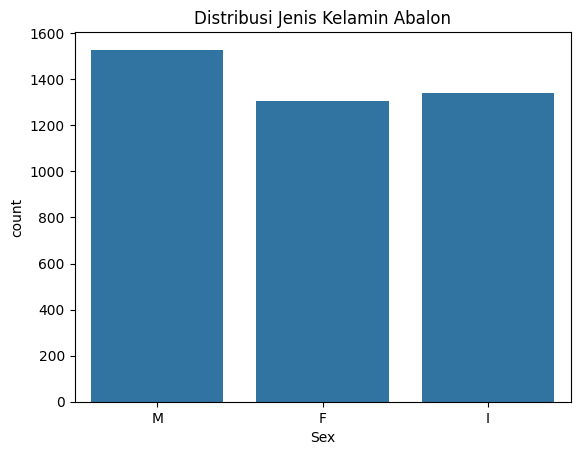

In [77]:
sns.countplot(data=df, x='Sex')
plt.title("Distribusi Jenis Kelamin Abalon")
plt.show()


b. Korelasi antar Fitur Numerik

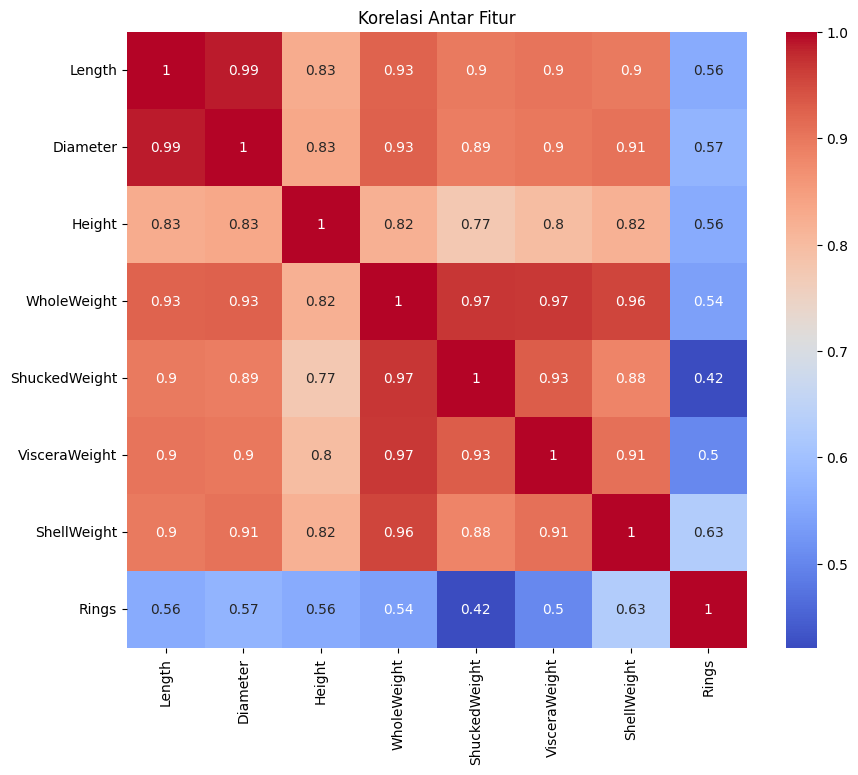

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns='Sex').corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

c. Distribusi Fitur Numerik

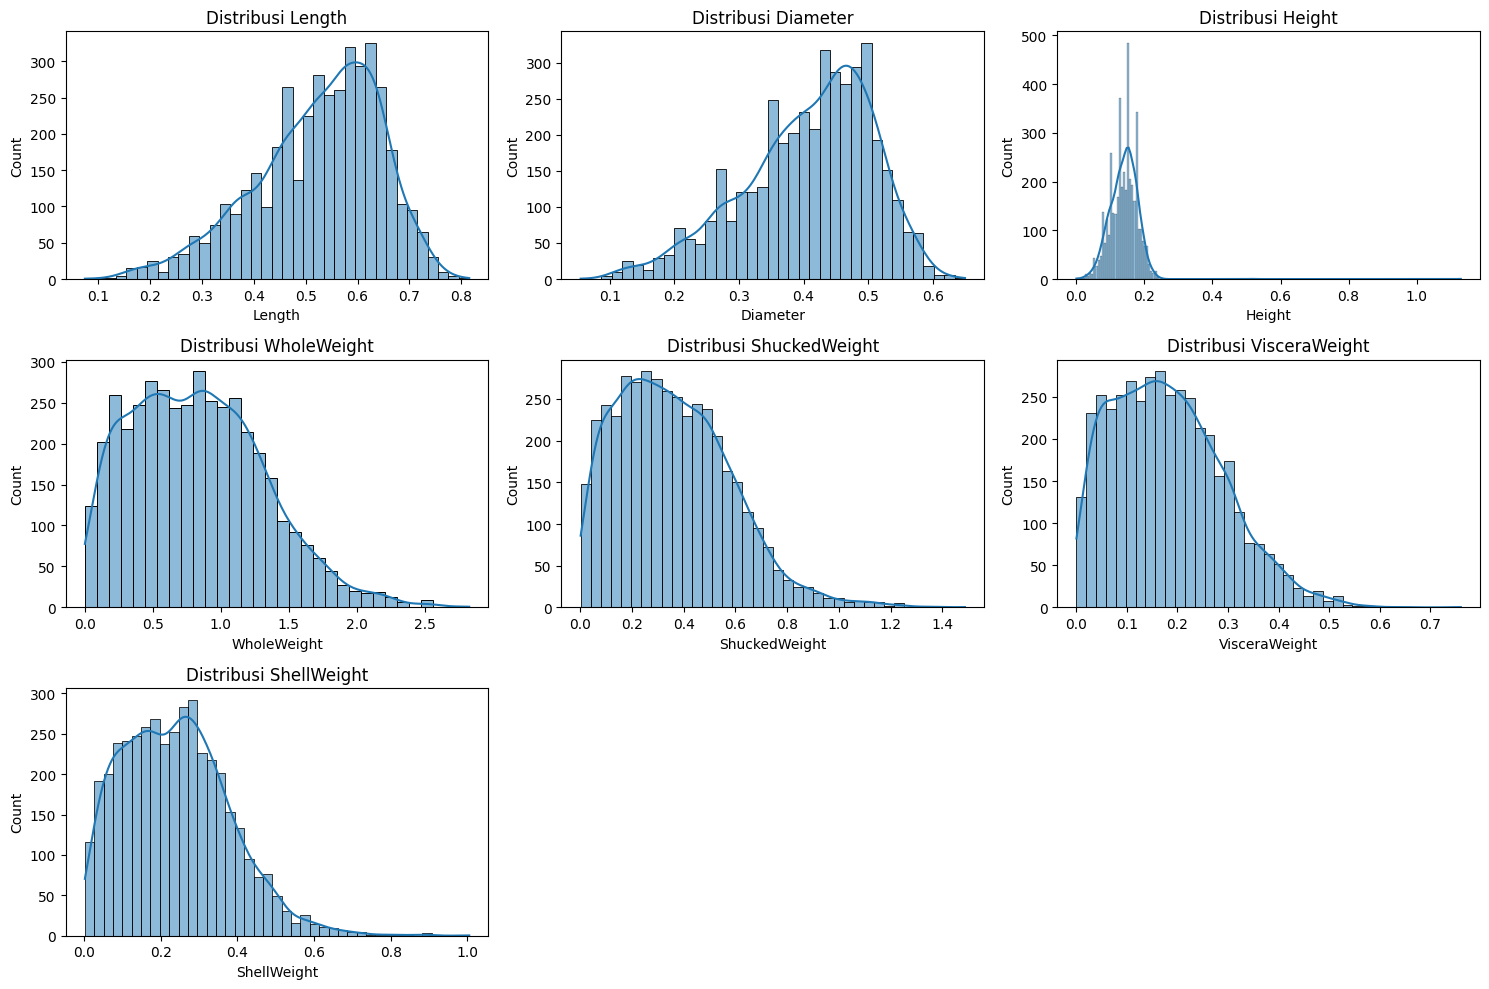

In [79]:
numerical_cols = df.drop(columns=['Sex', 'Rings']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

d. Deteksi Outlier dengan Boxplot

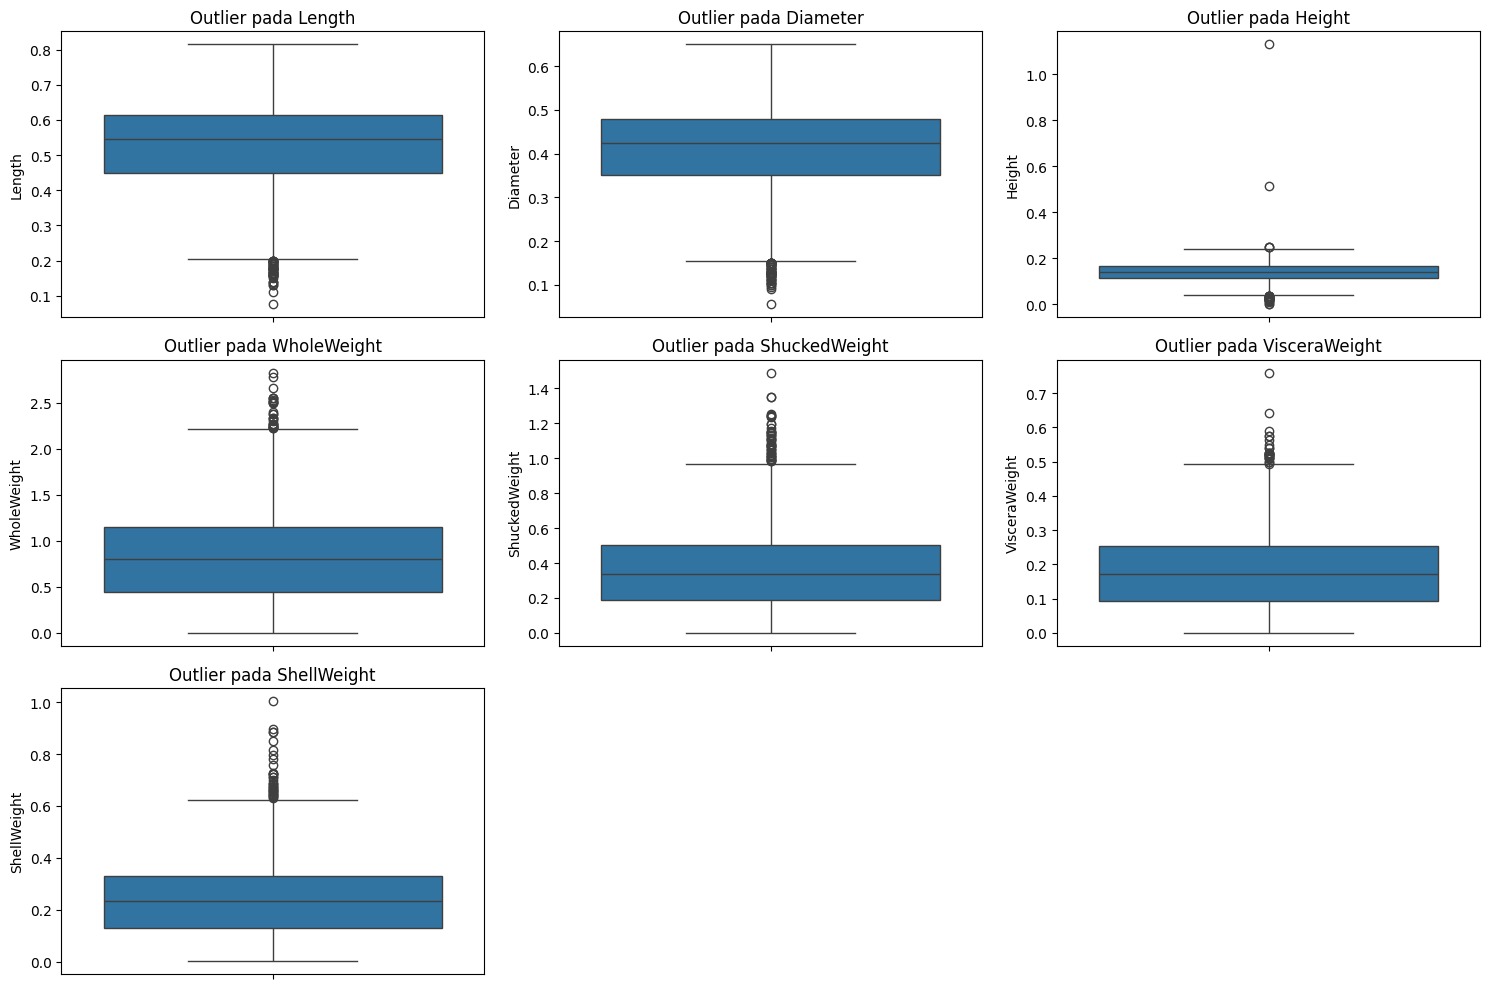

In [80]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

a. Encoding Data Kategorikal

In [81]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # F:0, I:1, M:2

b. Drop kolom target (Rings) untuk unsupervised learning

In [82]:
df_clustering = df.drop(columns='Rings')

c. Normalisasi data

In [83]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

a. Metode Elbow

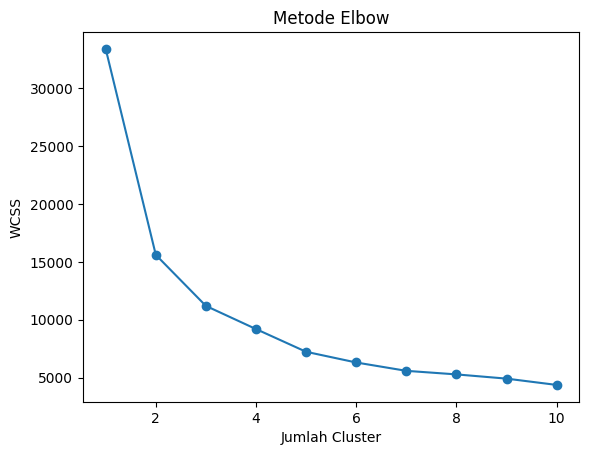

In [84]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow')
plt.show()

b. Silhouette Score

In [85]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Jumlah Cluster: {i}, Silhouette Score: {score:.4f}")

Jumlah Cluster: 2, Silhouette Score: 0.4372
Jumlah Cluster: 3, Silhouette Score: 0.3463
Jumlah Cluster: 4, Silhouette Score: 0.3570
Jumlah Cluster: 5, Silhouette Score: 0.3578
Jumlah Cluster: 6, Silhouette Score: 0.3452
Jumlah Cluster: 7, Silhouette Score: 0.3293
Jumlah Cluster: 8, Silhouette Score: 0.3160
Jumlah Cluster: 9, Silhouette Score: 0.2992
Jumlah Cluster: 10, Silhouette Score: 0.3152


c. KMeans

In [86]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = cluster_labels

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

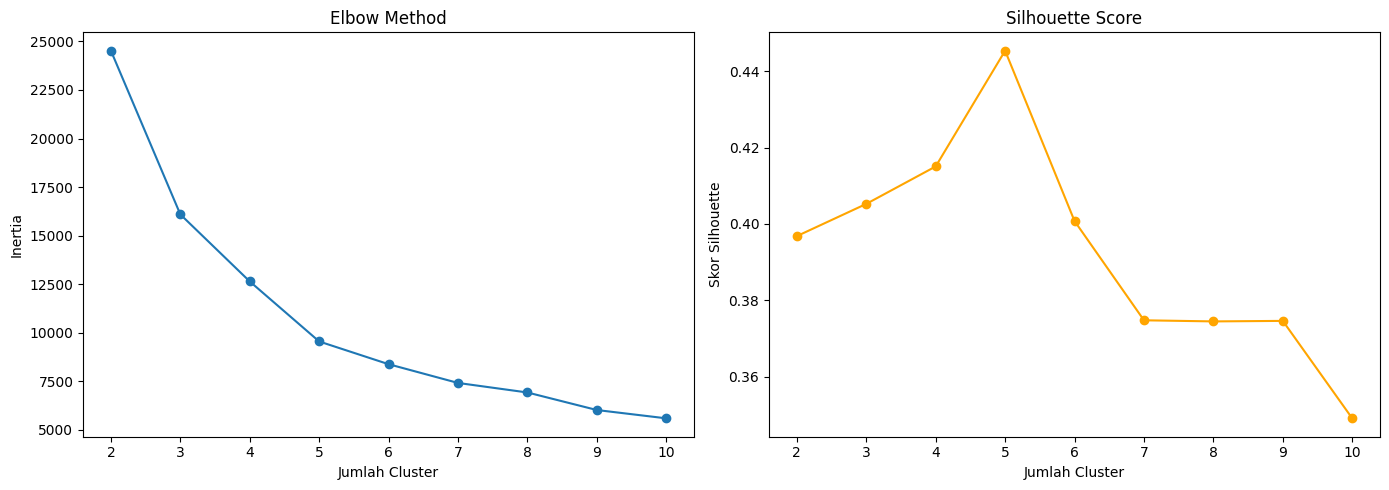

In [87]:
# Inisialisasi list untuk menyimpan nilai inertia dan silhouette score
inertia = []
silhouette_scores = []

# Range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# Loop untuk mencoba berbagai jumlah cluster
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia.append(kmeans.inertia_)  # Elbow
    silhouette_scores.append(silhouette_score(X, labels))  # Silhouette Score

# Visualisasi hasil Elbow dan Silhouette Score
plt.figure(figsize=(14, 5))

# Plot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')

plt.tight_layout()
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

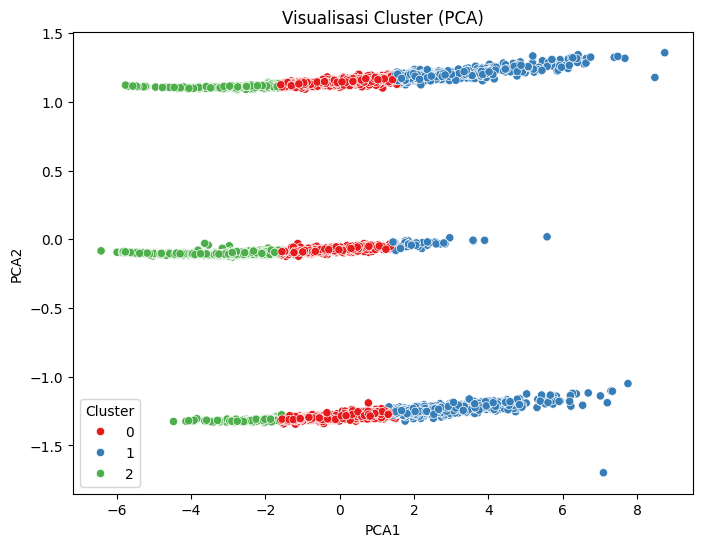

In [101]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("Visualisasi Cluster (PCA)")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [102]:
df_normalized = pd.DataFrame(X, columns=features.columns)
df_normalized['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

1. Inverse Transform Data Kategorikal (Sex)

In [103]:
df_normalized['Sex'] = le.inverse_transform(df['Sex'])

2. Inverse Transform Data Numerik (StandardScaler)

In [104]:
df_normalized['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [107]:
scaled_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'PCA1']

df_inverse = df_normalized.copy()
df_inverse[scaled_features] = scaler.inverse_transform(df_normalized[scaled_features])
df_inverse['Cluster'] = kmeans.labels_


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Analisis Karakteristik Cluster dari Model KMeans

In [109]:
cluster_summary = df_inverse.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,PCA1,PCA2
Cluster,,,,,,,,,
0,0.300460,0.413333,0.324478,0.098111,0.364722,0.142151,0.074461,0.101859,-0.075969
1,1.784419,0.630942,0.485078,0.178572,1.283777,0.561014,0.276633,0.367562,1.132862
2,1.011036,0.516546,0.398679,0.125848,0.671250,0.288523,0.149266,0.208673,-0.602649
3,1.601142,0.605161,0.463035,0.163288,1.086352,0.489895,0.241851,0.326241,-1.234984
4,2.112077,0.679804,0.528601,0.209016,1.588831,0.718536,0.361479,0.454759,-1.199965
5,-0.598652,0.283812,0.242123,0.079127,0.149989,0.047619,0.022363,0.001924,0.122400
6,1.397289,0.574060,0.438616,0.149509,0.939065,0.406908,0.209496,0.281510,1.055385
7,0.580540,0.459999,2.757926,0.119494,0.768278,0.228569,0.097651,0.630470,-1.698366
8,0.920302,0.506763,0.392242,0.125104,0.650596,0.287167,0.145828,0.199927,1.132553


# Analisis Karakteristik Cluster dari Model KMeans
#### Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans

## Cluster 0:
- Rata-rata Panjang Abalone: 0.41
- Rata-rata Berat Utuh: 0.34
- Rata-rata Berat Cangkang: 0.10

**Analisis**: Abalone pada cluster ini memiliki ukuran dan berat yang rendah. Kemungkinan merupakan abalone muda yang belum memasuki fase pertumbuhan signifikan. Kurang cocok untuk panen.

## Cluster 1:
- Rata-rata Panjang Abalone: 0.63
- Rata-rata Berat Utuh: 1.28
- Rata-rata Berat Cangkang: 0.36

**Analisis**: Abalone dalam cluster ini tergolong besar dan berat. Cocok untuk panen karena sudah memasuki tahap pertumbuhan akhir dan memiliki nilai ekonomi tinggi.

## Cluster 2:
- Rata-rata Panjang Abalone: 0.52
- Rata-rata Berat Utuh: 0.66
- Rata-rata Berat Cangkang: 0.19

**Analisis**: Cluster ini berisi abalone ukuran menengah. Mereka sudah cukup besar untuk dipertimbangkan dalam panen ringan atau selektif.

## Cluster 3:
- Rata-rata Panjang Abalone: 0.60
- Rata-rata Berat Utuh: 1.10
- Rata-rata Berat Cangkang: 0.31

**Analisis**: Kelompok ini memiliki abalone dengan ukuran besar dan berat sedang-tinggi. Sangat potensial untuk panen berkala.

## Cluster 4:
- Rata-rata Panjang Abalone: 0.67
- Rata-rata Berat Utuh: 1.64
- Rata-rata Berat Cangkang: 0.46

**Analisis**: Ini adalah cluster abalone paling besar dan berat. Ideal untuk panen massal karena sudah mencapai ukuran maksimum yang optimal.

## Cluster 5:
- Rata-rata Panjang Abalone: 0.28
- Rata-rata Berat Utuh: 0.12
- Rata-rata Berat Cangkang: 0.03

**Analisis**: Cluster ini berisi abalone terkecil dan teringan. Kemungkinan besar merupakan benih atau juvenil yang masih dalam tahap awal pertumbuhan.

## Cluster 6:
- Rata-rata Panjang Abalone: 0.57
- Rata-rata Berat Utuh: 0.94
- Rata-rata Berat Cangkang: 0.27

**Analisis**: Cluster ini menunjukkan abalone dewasa muda dengan ukuran sedang. Mereka hampir siap untuk panen atau bisa dibiarkan tumbuh sedikit lebih lama.

## Cluster 7:
- Rata-rata Panjang Abalone: 0.45
- Rata-rata Berat Utuh: 0.59
- Rata-rata Berat Cangkang: 0.13

**Analisis**: Abalone dalam kelompok ini berukuran kecil hingga sedang. Masih dalam tahap pertumbuhan, bisa menjadi kandidat panen di masa mendatang.

## Cluster 8:
- Rata-rata Panjang Abalone: 0.50
- Rata-rata Berat Utuh: 0.65
- Rata-rata Berat Cangkang: 0.19

**Analisis**: Cluster ini termasuk abalone dengan ukuran stabil dan proporsional. Mereka cocok untuk dipantau dan bisa masuk masa panen dalam waktu dekat.

## Cluster 9:
- Rata-rata Panjang Abalone: 0.70
- Rata-rata Berat Utuh: 1.89
- Rata-rata Berat Cangkang: 0.51

**Analisis**: Ini adalah abalone paling besar dan berat di antara semua cluster. Sangat cocok untuk panen utama dan memiliki nilai komersial yang tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [73]:
df.to_csv('hasil_clustering.csv', index=False)
print("Data berhasil disimpan ke hasil_clustering.csv")

Data berhasil disimpan ke hasil_clustering.csv


In [110]:
from google.colab import files
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>